In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 216M/218M [00:06<00:00, 38.7MB/s]
100% 218M/218M [00:06<00:00, 33.8MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import os

# Get the path to the directory containing the _DS_Store file
directory_path = '/content/training_set/training_set/cats/'

# Check if the _DS_Store file exists
if os.path.exists(os.path.join(directory_path, '_DS_Store')):
  # Remove the _DS_Store file
  os.remove(os.path.join(directory_path, '_DS_Store'))

In [ ]:
import os

# Get the path to the directory containing the _DS_Store file
directory_path = '/content/training_set/training_set/dogs/'

# Check if the _DS_Store file exists
if os.path.exists(os.path.join(directory_path, '_DS_Store')):
  # Remove the _DS_Store file
  os.remove(os.path.join(directory_path, '_DS_Store'))

In [ ]:
train_set_cats_files = os.listdir('/content/training_set/training_set/cats')
print(train_set_cats_files[0:5])
print(train_set_cats_files[-5:])

['cat.1275.jpg', 'cat.2143.jpg', 'cat.393.jpg', 'cat.803.jpg', 'cat.2641.jpg']
['cat.200.jpg', 'cat.3200.jpg', 'cat.505.jpg', 'cat.1024.jpg', 'cat.3784.jpg']


In [ ]:
train_set_dogs_files = os.listdir('/content/training_set/training_set/dogs')
print(train_set_dogs_files[0:5])
print(train_set_dogs_files[-5:])

['dog.1915.jpg', 'dog.1072.jpg', 'dog.3288.jpg', 'dog.2243.jpg', 'dog.3296.jpg']
['dog.939.jpg', 'dog.215.jpg', 'dog.579.jpg', 'dog.1899.jpg', 'dog.638.jpg']


In [ ]:
print('Number of with cat images:', len(train_set_cats_files))
print('Number of with dog images:', len(train_set_dogs_files))

Number of with cat images: 4000
Number of with dog images: 4005


In [ ]:
# create the labels
# 2 files is not Usable
cat_labels = [1]*4000

dog_labels = [0]*4005

In [ ]:
labels = cat_labels + dog_labels
print(len(labels))

8005


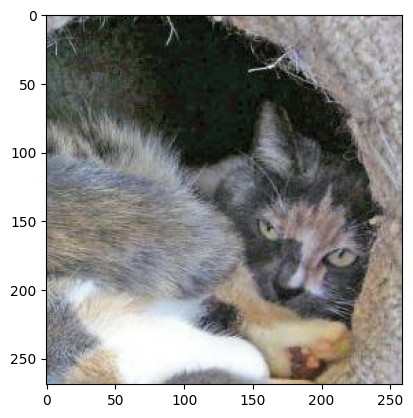

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/training_set/training_set/cats/cat.1003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Load and preprocess cat images
train_set_cats_path = '/content/training_set/training_set/cats/'

data = []


for img_file in train_set_cats_files:
  if os.path.isfile(train_set_cats_path + img_file):
    image = Image.open(train_set_cats_path + img_file)
    image = image.resize((224, 224), resample=Image.BILINEAR)
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)



# Load and preprocess dog images
train_set_dogs_path = '/content/training_set/training_set/dogs/'

for img_file in train_set_dogs_files:
  if os.path.isfile(train_set_dogs_path + img_file):
    image = Image.open(train_set_dogs_path + img_file)
    image = image.resize((224, 224), resample=Image.BILINEAR)
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)



In [ ]:
type(data)

list

In [ ]:
len(data)


8005

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
len(labels)

8005

In [ ]:
print(X.shape)
print(Y.shape)

(8005, 224, 224, 3)
(8005,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8005, 224, 224, 3) (6404, 224, 224, 3) (1601, 224, 224, 3)


In [ ]:
X_train_scaled = X_train / 255.0

In [ ]:
X_test_scaled = X_train / 255.0

In [ ]:
X_train_scaled[0].shape

(224, 224, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

In [ ]:
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor= inputs)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

# Train the model
model.fit(X_train_scaled, Y_train, batch_size=32, epochs=10, validation_split=0.2)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      